In [1]:
import requests
from bs4 import BeautifulSoup
import scrapy

from pandas import DataFrame
from numpy import std, median, NaN
from matplotlib import pyplot as plt

In [59]:
def combine_search_url(search, place=None):
    search = '-'.join(search.split(' '))
    if place:
        url_combine = 'https://www.ebay-kleinanzeigen.de' + '/s-' + place + '/' + search + '/k0'
    else:
        url_combine = 'https://www.ebay-kleinanzeigen.de' + '/s-' + search + '/k0'
    return url_combine

# Setzt die Headers der Anfrage (Den User-Agent), damit Ebay-Kleinanzeigen die Anfrage nicht blockt.
def get_ebay_page(search_url):

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36 Edg/84.0.522.59',
    }
    # Gibt den HTML text der Website in eine Variable wieder.
    response = requests.get(url=search_url, headers=headers)
    #response = requests.get(ebay_url)
    if response.ok:
        print ('OK!')
    else:
        print ('Boo!')
    return response

def test_search_success(soup):
    try: 
        if 'Es wurden leider keine Ergebnisse' in soup.find('div', class_='outcomemessage-warning').text:
            print('No search results found.')
    except:
        print('Found something.')

ebay_url = 'https://www.ebay-kleinanzeigen.de'
ebay_url_combine = combine_search_url('motherboard defekt')
print('Search URL is', ebay_url_combine)

response = get_ebay_page(ebay_url_combine)

soup = BeautifulSoup(response.text, "html.parser")
test_search_success(soup)
#print(soup.prettify())

Search URL is https://www.ebay-kleinanzeigen.de/s-motherboard-defekt/k0
OK!
Found something.


In [87]:
titles = []
urls = []
images = []
places = []
prices = []
shipping = []
VB_sign = []

srch = soup.find_all('li', class_="ad-listitem lazyload-item")
for s in srch:
    #export titles
    try:
        title = s.find('a', class_="ellipsis")
        titles.append(title.text)
    except:
        title.append('no title')

    #export links
    try:
        link = s.find('div', class_="aditem-image")
        urls.append(ebay_url + str(link.a['href']))
    except:
        urls.append(NaN)

    #export urls
    #image = s.find('div', class_="imagebox srpimagebox" )
    #print(image)

    #export places
    try:
        place = s.find('div', class_="aditem-main--top--left")
        place_s = str(place.text).replace('\n', '')
        places.append(place_s)
    except:
        places.append(NaN)

    #export prices
    try:
        price = s.find('p', class_="aditem-main--middle--price-shipping--price")
        for p in price.text.split('\n'):
            if p != '':
                prices.append(p.strip())
    except:
        prices.append(NaN)

    #export shipping prices
    try:
        ship = s.find('p', class_="aditem-main--middle--price-shipping--shipping")
        shipping.append(str(ship.text).replace('\n', ''))
    except:
        shipping.append(NaN)
  
df = DataFrame(list(zip(titles, urls, prices, places, shipping)),
                columns =['Title', 'URL', 'Price', 'Place', 'Shipping possible'])
df['VB possible'] = [1 if 'VB' in x else 0 for x in df['Price']]
df

,Title,URL,Price,Place,Shipping possible,VB possible
0,MSI Z170A GAMING PRO CARBON Motherboard - Defe...,https://www.ebay-kleinanzeigen.de/s-anzeige/ms...,25 € VB,35586 Wetzlar,Ve...,1
1,Gigabyte Motherboard teildefekt! LESEN!!!!,https://www.ebay-kleinanzeigen.de/s-anzeige/gi...,30 €,68239 Mannheim,Ve...,0
2,MSI Z97 Gaming 5 Motherboard Teildefekt,https://www.ebay-kleinanzeigen.de/s-anzeige/ms...,35 €,34132 Kassel,Ve...,0
3,Asus Crosshair V Formula Motherboard Defekt,https://www.ebay-kleinanzeigen.de/s-anzeige/as...,80 €,26409 Wittmund,Ve...,0
4,"ASRock Z97 Anniversary Motherboard ""Defekt""",https://www.ebay-kleinanzeigen.de/s-anzeige/as...,VB,55743 Idar-​Oberstein,Ve...,1
5,Motherboard defekt und RAM,https://www.ebay-kleinanzeigen.de/s-anzeige/mo...,10 €,59227 Ahlen,NaN,0
6,Samsung Galaxy A5 2017 Motherboard defekt,https://www.ebay-kleinanzeigen.de/s-anzeige/sa...,Zu verschenken,95444 Bayreuth,Ve...,0
7,Msi 1150 Motherboard Defekt,https://www.ebay-kleinanzeigen.de/s-anzeige/ms...,Zu verschenken,69469 Weinheim,NaN,0
8,ASRock H110 Pro BTC+ 13 GPU Mining-Motherboard...,https://www.ebay-kleinanzeigen.de/s-anzeige/as...,50 €,77933 Lahr (Schwarzwald),Ve...,0
9,All in One Motherboard (Defekt),https://www.ebay-kleinanzeigen.de/s-anzeige/al...,1 € VB,15517 Fürstenwalde (Spree),Ve...,1


In [88]:
# replace strings in Price column

replace_dic = {' € VB': '', 
            'Zu verschenken':'0', 
            ' €': '',
            'VB': '0'}

df['Price_int'] = df['Price'].replace(replace_dic, regex=True).astype('Int64')
df

,Title,URL,Price,Place,Shipping possible,VB possible,Price_int
0,MSI Z170A GAMING PRO CARBON Motherboard - Defe...,https://www.ebay-kleinanzeigen.de/s-anzeige/ms...,25 € VB,35586 Wetzlar,Ve...,1,25
1,Gigabyte Motherboard teildefekt! LESEN!!!!,https://www.ebay-kleinanzeigen.de/s-anzeige/gi...,30 €,68239 Mannheim,Ve...,0,30
2,MSI Z97 Gaming 5 Motherboard Teildefekt,https://www.ebay-kleinanzeigen.de/s-anzeige/ms...,35 €,34132 Kassel,Ve...,0,35
3,Asus Crosshair V Formula Motherboard Defekt,https://www.ebay-kleinanzeigen.de/s-anzeige/as...,80 €,26409 Wittmund,Ve...,0,80
4,"ASRock Z97 Anniversary Motherboard ""Defekt""",https://www.ebay-kleinanzeigen.de/s-anzeige/as...,VB,55743 Idar-​Oberstein,Ve...,1,0
5,Motherboard defekt und RAM,https://www.ebay-kleinanzeigen.de/s-anzeige/mo...,10 €,59227 Ahlen,NaN,0,10
6,Samsung Galaxy A5 2017 Motherboard defekt,https://www.ebay-kleinanzeigen.de/s-anzeige/sa...,Zu verschenken,95444 Bayreuth,Ve...,0,0
7,Msi 1150 Motherboard Defekt,https://www.ebay-kleinanzeigen.de/s-anzeige/ms...,Zu verschenken,69469 Weinheim,NaN,0,0
8,ASRock H110 Pro BTC+ 13 GPU Mining-Motherboard...,https://www.ebay-kleinanzeigen.de/s-anzeige/as...,50 €,77933 Lahr (Schwarzwald),Ve...,0,50
9,All in One Motherboard (Defekt),https://www.ebay-kleinanzeigen.de/s-anzeige/al...,1 € VB,15517 Fürstenwalde (Spree),Ve...,1,1


Among 19 prices the lowest price is 0, the highest price is 195.
Average of the list is 37.10526315789474 +- 49.135747042523946
Median is 25.0


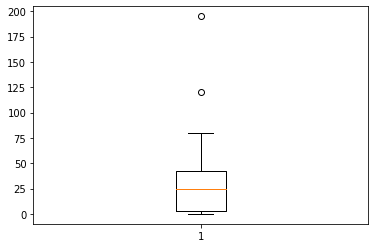

In [99]:
print('Among {} prices the lowest price is {}, the highest price is {}.'.format(len(df), df.Price_int.min(), df.Price_int.max()))
print('Average of the list is {} +- {}'.format(df['Price_int'].mean(), df['Price_int'].std()))
print('Median is {}'.format(df['Price_int'].median()))
plt.boxplot(df['Price_int'])
plt.show()

In [100]:
# first try
"""
prices = soup.find_all('p', class_="aditem-main--middle--price-shipping--price")
prod_prices = list()
for price in prices:
    for p in price.text.split('\n'):
        if p != '':
            prod_prices.append(p.strip())
print(prod_prices)

sign_vb = [1 if 'VB' in x else 0 for x in prod_prices]
#print(sign_vb)

replace_dic = {' € VB': '', 
            'Zu verschenken':'0', 
            ' €': '',
            'VB': '0'}
for k, v in replace_dic.items():
    prod_prices = list(map(lambda x: x.replace(k, v), prod_prices))

prod_prices = [int(x) for x in prod_prices]
print(prod_prices)


print('Among {} prices the lowest price is {}, the highest price is {}.'.format(len(prod_prices), min(prod_prices), max(prod_prices)))
print('Average of the list is {} +- {}'.format(sum(prod_prices) / len(prod_prices), std(prod_prices)))
print('Median is {}'.format(median(prod_prices)))

plt.hist(prod_prices)
"""

'\nprices = soup.find_all(\'p\', class_="aditem-main--middle--price-shipping--price")\nprod_prices = list()\nfor price in prices:\n    for p in price.text.split(\'\n\'):\n        if p != \'\':\n            prod_prices.append(p.strip())\nprint(prod_prices)\n\nsign_vb = [1 if \'VB\' in x else 0 for x in prod_prices]\n#print(sign_vb)\n\nreplace_dic = {\' € VB\': \'\', \n            \'Zu verschenken\':\'0\', \n            \' €\': \'\',\n            \'VB\': \'0\'}\nfor k, v in replace_dic.items():\n    prod_prices = list(map(lambda x: x.replace(k, v), prod_prices))\n\nprod_prices = [int(x) for x in prod_prices]\nprint(prod_prices)\n\n\nprint(\'Among {} prices the lowest price is {}, the highest price is {}.\'.format(len(prod_prices), min(prod_prices), max(prod_prices)))\nprint(\'Average of the list is {} +- {}\'.format(sum(prod_prices) / len(prod_prices), std(prod_prices)))\nprint(\'Median is {}\'.format(median(prod_prices)))\n\nplt.hist(prod_prices)\n'

In [52]:
def extract_search_results(soup):
    titles = []
    urls = []
    images = []
    places = []
    prices = []
    shipping = []
    srch = soup.find_all('li', class_="ad-listitem lazyload-item")
    for s in srch:
        #export titles
        try:
            title = s.find('a', class_="ellipsis")
            titles.append(title.text)
        except:
            titles.append('no title')

        #export links
        try:
            link = s.find('div', class_="aditem-image")
            urls.append(ebay_url + str(link.a['href']))
        except:
            urls.append(NaN)

        #export images
        #image = s.find('div', class_="imagebox srpimagebox" )
        #print(image)

        #export places
        try:
            place = s.find('div', class_="aditem-main--top--left")
            place_s = str(place.text).replace('\n', '')
            places.append(place_s)
        except:
            places.append(NaN)

        #export prices
        try:
            price = s.find('p', class_="aditem-main--middle--price-shipping--price")
            for p in price.text.split('\n'):
                if p != '':
                    prices.append(p.strip())
        except:
            prices.append(NaN)

        #export shipping prices
        try:
            ship = s.find('p', class_="aditem-main--middle--price-shipping--shipping")
            shipping.append(str(ship.text).replace('\n', ''))
        except:
            shipping.append(NaN)
    return titles, urls, images, places, prices, shipping

pagination = [ebay_url_combine]
titles = []
urls = []
images = []
places = []
prices = []
shipping = []
VB_sign = []

titles_temp = []
urls_temp = []
images_temp = []
places_temp = []
prices_temp = []
shipping_temp = []
VB_sign_temp = []

if 'Es wurden leider keine Ergebnisse' in soup.find('div', class_='outcomemessagewarning'):
    print('no result found')

for s in soup.findAll('div', class_='pagination-pages'):
    pages = s.findAll('a', attrs={'class':"pagination-page"}, href=True)
    for a in pages:
        pagination.append(ebay_url+str(a["href"]))

for page in pagination:
    response_page = get_ebay_page(page)
    soup_temp = BeautifulSoup(response_page.text, "html.parser")
    #print(soup_temp)
    titles_temp, urls_temp, images_temp, places_temp, prices_temp, shipping_temp = extract_search_results(soup_temp)
    #print(titles_temp)
    titles.extend(titles_temp)
    urls.extend(urls_temp)
    images.extend(images_temp)
    places.extend(places_temp)
    prices.extend(prices_temp)
    shipping.extend(shipping_temp)

print(len(titles))

df = DataFrame(list(zip(titles, urls, prices, places, shipping)),
                columns =['Title', 'URL', 'Price', 'Place', 'Shipping possible'])
df['VB possible'] = [1 if 'VB' in x else 0 for x in df['Price'].astype('str')]
df


OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
OK!
216


,Title,URL,Price,Place,Shipping possible,VB possible
0,Asus Rampage V Extreme mit OC Module und Blend...,https://www.ebay-kleinanzeigen.de/s-anzeige/as...,80 €,08309 Eibenstock,Ve...,0
1,Asus prime z490 defekt,https://www.ebay-kleinanzeigen.de/s-anzeige/as...,30 € VB,86650 Wemding,Ve...,1
2,Verkaufe ASRock z77 pro als defekt für Bastler,https://www.ebay-kleinanzeigen.de/s-anzeige/ve...,10 €,75175 Pforzheim,Ve...,0
3,DEFEKT - MSI Z97 GAMING 5 1150 i3 i5 i7 PC Mot...,https://www.ebay-kleinanzeigen.de/s-anzeige/de...,39 €,78315 Radolfzell am Bodensee,Ve...,0
4,MSi A320M-A PRO DEFEKT!,https://www.ebay-kleinanzeigen.de/s-anzeige/ms...,25 € VB,15569 Woltersdorf,Ve...,1
...,...,...,...,...,...,...
211,Motherboard defekt Mac Book Air 2008 1304,https://www.ebay-kleinanzeigen.de/s-anzeige/mo...,VB,91567 Herrieden,Ve...,1
212,ASRock Z87 Pro 4 Mainboard Motherboard Intel -...,https://www.ebay-kleinanzeigen.de/s-anzeige/as...,20 €,65934 Nied,Ve...,0
213,Mainboard für DELL XPS 8700 - Defekt!!,https://www.ebay-kleinanzeigen.de/s-anzeige/ma...,10 €,65193 Wiesbaden,Ve...,0
214,Toshiba Tecra S1 Laptop defekt,https://www.ebay-kleinanzeigen.de/s-anzeige/to...,36 € VB,14089 Spandau,Ve...,1


In [57]:
test_error_url = combine_search_url('mother board defekt')
request_error = get_ebay_page(test_error_url)
soup = BeautifulSoup(request_error.content, 'html.parser')


OK!
No search results found.
